## Is it a Quby?

In [1]:
%pip install -Uqq fastai duckduckgo_search fastbook

Note: you may need to restart the kernel to use updated packages.


In [1]:
from fastai.vision.all import *
from fastcore.all import *

path = Path("quby_or_not")

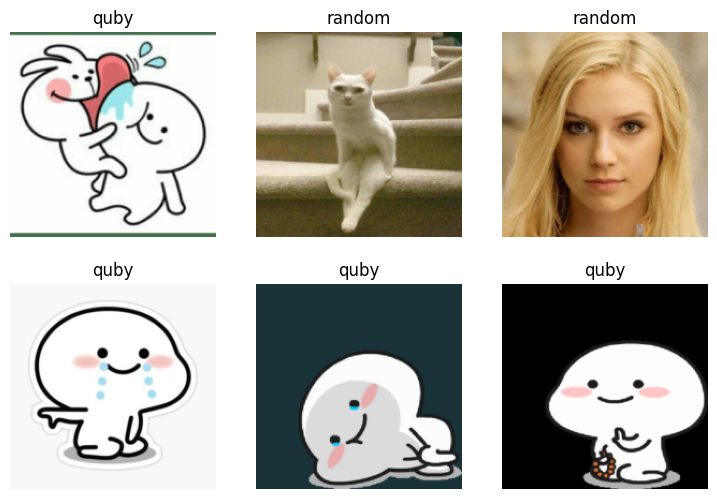

In [2]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [3]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/chiewjianzhi/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 27.5MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.667295,0.131708,0.045977,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.158084,0.146743,0.045977,00:05
1,0.090678,0.112119,0.045977,00:03
2,0.058786,0.139348,0.034483,00:02
3,0.054766,0.109937,0.034483,00:02
4,0.040316,0.111219,0.034483,00:02


In [4]:
is_quby,_,probs = learn.predict(PILImage.create('quby.jpg'))
print(f"This is a: {is_quby}.")
print(f"Probability it's a quby: {probs[0]:.4f}")

FileNotFoundError: [Errno 2] No such file or directory: 'quby.jpg'

In [ ]:
is_quby, _, probs = learn.predict(PILImage.create("cat.jpg"))
print(f"This is a: {is_quby}.")
print(f"Probability it's a quby: {probs[0]:.4f}")